In [4]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sb
import matplotlib.pyplot as matplot
from pandas import plotting
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn import tree
from pdpbox import pdp, get_dataset, info_plots
from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import confusion_matrix
from pandas_profiling import ProfileReport
from xgboost import XGBClassifier
from sklearn import svm
#Data relatioship
%matplotlib inline
import warnings
import eli5
warnings.filterwarnings('ignore')
from plotly.offline import iplot, init_notebook_mode
import plotly.offline as py
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.graph_objs as go
import datetime as dt

# 1.  Data Load

In [2]:
# Unique Startup Record
startup_df = pd.read_csv('companies.csv')

# Unique records for each round per company
Funding_rounds_df = pd.read_csv('rounds.csv')

# Unique record for each company acquisition
acquisitions_df = pd.read_csv('acquisitions.csv')

# Unique recirds for each investment
investmentsDetails_df = pd.read_csv('investments.csv')

In [3]:
# Top 2 records for company dataframe
startup_df.head(2)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14


In [4]:
# Top 5 records for acquisitions dataframe
acquisitions_df.head(5)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2012-02-02,2012-02,9000000.0,USD
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,NY,New York City,Mamaroneck,2001-02-02,2001-02,NaN,USD


In [6]:
# Top 2 records for investment rounds dataframe
Funding_rounds_df.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [8]:
# Top 2 records for investments dataframe
investmentsDetails_df.head(2)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN


In [9]:
# Check the shape of each dataframe
print("The shape of company is:     ",startup_df.shape)
print("The shape of acquisition is: ",acquisitions_df.shape)
print("The shape of rounds is:      ",Funding_rounds_df.shape)
print("The shape of investments is: ",investmentsDetails_df.shape)

The shape of company is:      (66368, 14)
The shape of acquisition is:  (18968, 18)
The shape of rounds is:       (114949, 12)
The shape of investments is:  (168647, 18)


#    2. ALL Startup Companies processing

In [10]:
categories_df = pd.DataFrame(startup_df.category_list.unique(), columns = ['category_list'])
categories_df = categories_df.dropna(subset=['category_list'])
categories_df.head(5)

,category_list
0,Media
1,Application Platforms|Real Time|Social Network...
2,Apps|Games|Mobile
3,Curated Web
4,Software


In [11]:
categories_df['category_list'] = categories_df['category_list'].str.lower()

In [12]:
# Extract all the "HEALTH CARE categories from all available categories
#categories_df = categories_df[categories_df.category_list.str.contains('App medical|biotechnology|health and wellness|health care|health care information technology|hospitals|personal health|health diagnostics|medical devices|pharmaceuticals|doctors|health care|health care information technology|mobile health|life sciences|health services industry|diabetes|therapeutics|medication adherence|physicians|mhealth|fitness', regex=True)]

In [16]:
print("Total unique categories are: ", categories_df.shape)

Total unique categories are:  (27296, 1)


In [17]:
# Filter startups with no missing "Category"
startup_df_nonNA = startup_df.dropna(subset=['category_list'])
startup_df_nonNA['category_list'] = startup_df_nonNA['category_list'].str.lower()
print("Total unique startups with NO MISSING Category are: ", startup_df_nonNA.shape)

Total unique startups with NO MISSING Category are:  (63220, 14)


In [18]:
print(" Total [unique] startups : ",startup_df_nonNA.shape)
startup_df_nonNA.head(5)

 Total [unique] startups :  (63220, 14)


,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,curated web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [17]:
# drop extra columns and drop null in first_funding_at

In [19]:
startup_df_nonNA = startup_df_nonNA.drop(['permalink','region','founded_at'], axis = 1)
startup_df_nonNA = startup_df_nonNA.dropna(subset=['first_funding_at'])
startup_df_nonNA.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at
0,#fame,http://livfame.com,media,10000000,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878,operating,NaN,NaN,NaN,1,2014-01-30,2014-01-30
3,0-6.com,http://www.0-6.com,curated web,2000000,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19
4,004 Technologies,http://004gmbh.de/en/004-interact,software,-,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24


###   2.2. Process the LOCATION for all Startups

In [20]:
# Null Value treatment for country, state and city
startup_df_nonNA['country_code'] = startup_df_nonNA['country_code'].fillna(value = 'blank')
startup_df_nonNA['state_code'] = startup_df_nonNA['state_code'].fillna(value = 'blank')
startup_df_nonNA['city'] = startup_df_nonNA['city'] .fillna(value = 'blank')
startup_df_nonNA.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at
0,#fame,http://livfame.com,media,10000000,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878,operating,blank,blank,blank,1,2014-01-30,2014-01-30
3,0-6.com,http://www.0-6.com,curated web,2000000,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19
4,004 Technologies,http://004gmbh.de/en/004-interact,software,-,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24


###   2.3 - use URL to create a CATEGORICAL feature for Startups

In [21]:
# change URL into category as TRUE/FALSE (0 if startups with No URL and 1 if URL Exists)
startup_df_nonNA[startup_df_nonNA.homepage_url.isna()]
startup_df_nonNA['homepage_url_new'] = np.where(startup_df_nonNA.homepage_url.isna(), 0, 1)
startup_df_nonNA.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new
0,#fame,http://livfame.com,media,10000000,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05,1
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878,operating,blank,blank,blank,1,2014-01-30,2014-01-30,1
3,0-6.com,http://www.0-6.com,curated web,2000000,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19,1
4,004 Technologies,http://004gmbh.de/en/004-interact,software,-,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1


###   2.4 - Adjust funding dates for all filtered  Startups

In [22]:
# Date formatting in first and last funding dates
startup_df_nonNA = startup_df_nonNA[startup_df_nonNA.first_funding_at.str.match(r'(19)|(20)')]
startup_df_nonNA = startup_df_nonNA[startup_df_nonNA.last_funding_at.str.match(r'(19)|(20)')]
startup_df_nonNA.shape

(63192, 12)

In [23]:
startup_df_nonNA.first_funding_at = pd.to_datetime(startup_df_nonNA.loc[:, 'first_funding_at'])
startup_df_nonNA.last_funding_at = pd.to_datetime(startup_df_nonNA.loc[:, 'last_funding_at'])
startup_df_nonNA.shape

(63192, 12)

In [24]:
# Fill '-' with NaNs to be treated as numeric
startup_df_nonNA.funding_total_usd.replace('-', np.nan, inplace=True)

In [25]:
startup_df_nonNA.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new
0,#fame,http://livfame.com,media,10000000,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05,1
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878,operating,blank,blank,blank,1,2014-01-30,2014-01-30,1
3,0-6.com,http://www.0-6.com,curated web,2000000,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19,1
4,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1


###   2.5 - CONVERT OBJECT TYPE to NUMBERS of STARTUPS for updation   

In [26]:
# Check out the data types for all features
startup_df_nonNA.dtypes

name                         object
homepage_url                 object
category_list                object
funding_total_usd            object
status                       object
country_code                 object
state_code                   object
city                         object
funding_rounds                int64
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
homepage_url_new              int32
dtype: object

In [27]:
# change the number values to NUMERIC datatype
startup_df_nonNA.funding_total_usd = pd.to_numeric(startup_df_nonNA.loc[:, 'funding_total_usd'])
startup_df_nonNA.funding_rounds = pd.to_numeric(startup_df_nonNA.loc[:, 'funding_rounds'])

In [28]:
# Verify the changed data types for FUNIDNG ROUNDS and FUNDING Amount
startup_df_nonNA.dtypes

name                         object
homepage_url                 object
category_list                object
funding_total_usd           float64
status                       object
country_code                 object
state_code                   object
city                         object
funding_rounds                int64
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
homepage_url_new              int32
dtype: object

In [29]:
startup_df_nonNA.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new
0,#fame,http://livfame.com,media,10000000.0,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05,1
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878.0,operating,blank,blank,blank,1,2014-01-30,2014-01-30,1
3,0-6.com,http://www.0-6.com,curated web,2000000.0,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19,1
4,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1


###   2.4 - STATUS Feature of STARTUPS

In [30]:
# unique STATUS for all Startups
startup_df_nonNA.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [32]:
# explored the CLOSED startups
startup_df_nonNA[startup_df_nonNA['status'] == 'closed'].count()

name                 5282
homepage_url         4917
category_list        5283
funding_total_usd    4526
status               5283
country_code         5283
state_code           5283
city                 5283
funding_rounds       5283
first_funding_at     5283
last_funding_at      5283
homepage_url_new     5283
dtype: int64

In [33]:
startup_tenYears = startup_df_nonNA[np.logical_and(np.logical_and(startup_df_nonNA.last_funding_at < '2015',
                   startup_df_nonNA.first_funding_at > '2005'),startup_df_nonNA.status == 'operating')]

print("Total OPRATING startups [First Funding > 2005 and Last funding <=2015] :", startup_tenYears.shape)

Total OPRATING startups [First Funding > 2005 and Last funding <=2015] : (36530, 12)


In [34]:
startup_df_nonNA.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new
0,#fame,http://livfame.com,media,10000000.0,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05,1
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878.0,operating,blank,blank,blank,1,2014-01-30,2014-01-30,1
3,0-6.com,http://www.0-6.com,curated web,2000000.0,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19,1
4,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1


#       3  ROUNDS data processing of ALL STARTUPS          

##       3.1 Use round table to formulate two additional columns for funding

In [35]:
# use ROUNDS dataframe to extract the funding round
Funding_rounds_df.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [36]:
# Total funding for available company categories
Funding_rounds_Category = Funding_rounds_df.dropna(subset=['company_category_list'])
Funding_rounds_Category['company_category_list'] = Funding_rounds_Category['company_category_list'].str.lower()
print("Total rounds for All category startups are: ", Funding_rounds_Category.shape)

Total rounds for All category startups are:  (111539, 12)


In [53]:
# Filter funding ROUNDS for Heathcare startups ONLY
#categ_rounds_df = categ_rounds_df[categ_rounds_df.company_category_list.str.contains('medical|biotechnology|health and wellness|health care|health care information technology|hospitals|personal health|health diagnostics|medical devices|pharmaceuticals|doctors|health care|health care information technology|mobile health|life sciences|health services industry|diabetes|therapeutics|medication adherence|physicians|mhealth|fitness', regex=True)]

In [37]:
Funding_rounds_Category.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-01-05,10000000.0
1,/organization/-qounter,:Qounter,application platforms|real time|social network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,NaN
2,/organization/-qounter,:Qounter,application platforms|real time|social network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,2014-03-01,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",apps|games|mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,2014-01-30,3406878.0
4,/organization/0-6-com,0-6.com,curated web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0


In [38]:
# remove unnecessary columns
Funding_rounds_Category.drop(['company_permalink','funding_round_permalink'], axis = 1, inplace=True)
Funding_rounds_Category.head()

,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,#fame,media,IND,16,Mumbai,Mumbai,venture,B,2015-01-05,10000000.0
1,:Qounter,application platforms|real time|social network...,USA,DE,DE - Other,Delaware City,venture,A,2014-10-14,NaN
2,:Qounter,application platforms|real time|social network...,USA,DE,DE - Other,Delaware City,seed,NaN,2014-03-01,700000.0
3,"(THE) ONE of THEM,Inc.",apps|games|mobile,NaN,NaN,NaN,NaN,venture,B,2014-01-30,3406878.0
4,0-6.com,curated web,CHN,22,Beijing,Beijing,venture,A,2008-03-19,2000000.0


In [39]:
# Arrenge based on Company Name and Funded Date
Funding_rounds_Category.sort_values(by=['company_name', 'funded_at'],
                            ascending=True,
                            inplace=True)

In [40]:
Funding_rounds_Category.funded_at = pd.to_datetime(Funding_rounds_Category.loc[:, 'funded_at'])

In [41]:
# Create column for time between rounds (Delta b/w first and last funding rounds)
Funding_rounds_Category['time_bt_next_round'] = Funding_rounds_Category.groupby(
    'company_name').funded_at.diff()

In [42]:
Funding_rounds_Category.head(5)

,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_type,funding_round_code,funded_at,raised_amount_usd,time_bt_next_round
14800,"#BratPackStyle, LLC.",content discovery|e-commerce|fashion|lifestyle...,USA,NY,New York City,New York,seed,NaN,2015-06-01,NaN,NaT
43095,#HASHOFF,digital media|internet|social media,USA,CO,Denver,Denver,debt_financing,NaN,2014-12-08,455000.0,NaT
43096,#HASHOFF,digital media|internet|social media,USA,CO,Denver,Denver,debt_financing,NaN,2015-08-11,500000.0,246 days
0,#fame,media,IND,16,Mumbai,Mumbai,venture,B,2015-01-05,10000000.0,NaT
109523,#waywire,entertainment|news|politics|social media,USA,NY,New York City,New York,seed,NaN,2012-06-30,1750000.0,NaT


In [43]:
# Calculate average time between rounds and average round amount raised
average_round_time_amount = Funding_rounds_Category.groupby('company_name').agg({'time_bt_next_round':pd.Series.mean,
                                                                     'raised_amount_usd':'mean'}).rename(columns={'time_bt_next_round': 'avg_time_bw_rounds',
                                                                                                                  'raised_amount_usd': 'avg_raised_usd'}).reset_index()

In [44]:
# Formulate a new data frame with only Delta and Average funding amount
average_round_time_amount.shape
average_round_time_amount.head()

,company_name,avg_time_bw_rounds,avg_raised_usd
0,"#BratPackStyle, LLC.",NaT,NaN
1,#HASHOFF,246 days,477500.0
2,#fame,NaT,10000000.0
3,#waywire,NaT,1750000.0
4,&TV Communications,111 days,2000000.0


In [45]:
# Replace null delta -(Avg round time) with Zero
average_round_time_amount.avg_time_bw_rounds.replace(to_replace=dt.timedelta(days=0),
                                value=np.nan,
                                inplace=True)

In [46]:
startup_df_round = startup_df_nonNA
startup_df_round.head()

,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new
0,#fame,http://livfame.com,media,10000000.0,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05,1
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878.0,operating,blank,blank,blank,1,2014-01-30,2014-01-30,1
3,0-6.com,http://www.0-6.com,curated web,2000000.0,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19,1
4,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1


In [47]:
# add time_bw_first_rounds to main dataframe

In [47]:
# Create a new column for time between funding rounds
startup_df_round['time_between_first_rounds'] = dt.timedelta(0)

In [48]:
#for company in Funding_rounds_Category.company_name.unique():
    if len(Funding_rounds_Category[Funding_rounds_Category.company_name ==company].funded_at) > 1:
        startup_df_round.loc[startup_df_round.name ==company, 'time_between_first_rounds'] = Funding_rounds_Category[
                Funding_rounds_Category.company_name == company].funded_at.values[
                    1] - Funding_rounds_Category[Funding_rounds_Category.company_name ==
                                         company].funded_at.values[0]

In [89]:
# A copy of above formulated dataset 
startup_df_roundCopy=startup_df_round
startup_df_roundCopy.shape

(63192, 17)

In [419]:
# merge avg_time_bw_rounds and avg_raised_usd

In [50]:
# rename name to company_name
startup_df_round.rename(columns={'name':'company_name'},inplace=True)
startup_df_round=startup_df_round.merge(average_round_time_amount, on ='company_name', how='left')

In [52]:
# Convert timedelta to days DATA TYPE
startup_df_round['avg_time_bw_rounds_float'] = startup_df_round.avg_time_bw_rounds.dt.days
startup_df_round['time_between_first_rounds_float']=startup_df_round.time_between_first_rounds.dt.days

print("The shape of clean startus is now: ", startup_df_round.shape)

The shape of clean startus is now:  (63192, 17)


In [53]:
startup_df_round.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float
0,#fame,http://livfame.com,media,10000000.0,operating,IND,16,Mumbai,1,2015-01-05,2015-01-05,1,0 days,NaT,10000000.0,NaN,0
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1,227 days,227 days,700000.0,227.0,227
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,apps|games|mobile,3406878.0,operating,blank,blank,blank,1,2014-01-30,2014-01-30,1,0 days,NaT,3406878.0,NaN,0
3,0-6.com,http://www.0-6.com,curated web,2000000.0,operating,CHN,22,Beijing,1,2008-03-19,2008-03-19,1,0 days,NaT,2000000.0,NaN,0
4,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,NaN,0


##       3.2 Filter USA based Startups from Funding Round details

In [54]:
# select only USA location based startups
startup_USA = startup_df_round[startup_df_round['country_code'] == 'USA']
startup_USA.shape

(36641, 17)

##       3.3 Arrange Status feature of USA based startups 

In [55]:
# Add a new STATUS column
startup_USA['statusCode'] = startup_USA['status']

In [56]:
# total unique STATUS for USA based startups
startup_USA.statusCode.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [57]:
#   Handle status codes based on date, status_new holds success 1/fail 0
#   if status operating for companies first funded 10 years ago since 2013, change to 0.

In [59]:
current_year = startup_USA.last_funding_at.max()

b = np.logical_and(
        np.logical_and(
            startup_USA.status == 'operating',
            startup_USA.first_funding_at >
            current_year - pd.offsets.DateOffset(years=10)),
        startup_USA.last_funding_at < current_year -
        pd.offsets.DateOffset(years=2, months=6))
b = pd.DataFrame(b)

for i in range(b.shape[0]):
    if b.iloc[i,0] == True:
        startup_USA.statusCode.iloc[i] = 0

In [60]:
startup_USA.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode
1,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.0,227.0,227,operating
4,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,NaN,0,operating
7,H2O.ai,http://h2o.ai/,analytics,33600000.0,operating,USA,CA,Mountain View,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.0,346.0,139,operating
8,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,San Francisco,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.0,465.0,566,operating
10,1-4 All,NaN,entertainment|games|software,NaN,operating,USA,NC,Connellys Springs,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,NaN,0,0


In [61]:
print("The NEW USA based startups are: ", startup_USA.shape)

The NEW USA based startups are:  (36641, 18)


In [62]:
# Convert operating(after 2013), acquired, ipo =1 AND closed = 0

#change remaining Operating to 1 (success) status code 
startup_USA['statusCode'].replace(['operating','acquired','ipo'],1,inplace=True)
startup_USA['statusCode'].replace(['closed'],0,inplace=True)

In [63]:
startup_USA.statusCode.value_counts()

1    23626
0    13015
Name: statusCode, dtype: int64

##  Investor Data processing for Healthcare Startups 

In [65]:
# Filter Out Investment for Healthcare category only
investmentsDetails_df['company_category_list']=investmentsDetails_df['company_category_list'].str.lower()

In [66]:
investmentsDetails_df.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,curated web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0


In [67]:
investment_selected= investmentsDetails_df.dropna(subset=['company_category_list'])

In [69]:
investment_selected['company_country_code'] = investment_selected['company_country_code'].fillna(value = 'unknown')
investment_selected.head() 

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,curated web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2000000.0
1,/organization/004-technologies,004 Technologies,software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,41250.0
3,/organization/0xdata,H2O.ai,analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,20000000.0
4,/organization/0xdata,H2O.ai,analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3000000.0


In [70]:
# Filter for USA based Healthcare startup investments
investment_selected = investment_selected[investment_selected['company_country_code'] == 'USA']

In [71]:
#### Total Investment per company

In [72]:
investment=[]
investment=pd.DataFrame(investment_selected.groupby('company_name')['investor_name'].nunique())

In [73]:
print("Total investment of healthcare catergories are: ", investment_selected.shape)

Total investment of healthcare catergories are:  (111275, 18)


In [74]:
# company and investor count
investment.reset_index(inplace=True)
investment.columns=['company_name','investor_count']

In [75]:
print("Total  investor count: ", investment.shape)
print("Unique  investors are: ", investment.investor_count.nunique())

Total  investor count:  (22419, 2)
Unique  investors are:  46


In [91]:
# merge investor_count with company details
startup_USA_Investment=startup_USA.merge(investment, on='company_name', how='left')
startup_USA_Investment.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count
0,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.0,227.0,227,1,NaN
1,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,NaN,0,1,1.0
2,H2O.ai,http://h2o.ai/,analytics,33600000.0,operating,USA,CA,Mountain View,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.0,346.0,139,1,11.0
3,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,San Francisco,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.0,465.0,566,1,12.0
4,1-4 All,NaN,entertainment|games|software,NaN,operating,USA,NC,Connellys Springs,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,NaN,0,0,NaN


In [92]:
print("Total startups with funding and Investment are:", startup_USA_Investment.shape)

Total startups with funding and Investment are: (36641, 19)


In [93]:
# Put atleast ONE investors for NULL values investor count (Assuming minimum one investor per startup)

startup_USA_Investment['investor_count'].fillna(1, inplace=True)
startup_USA_Investment.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count
0,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.0,227.0,227,1,1.0
1,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,NaN,0,1,1.0
2,H2O.ai,http://h2o.ai/,analytics,33600000.0,operating,USA,CA,Mountain View,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.0,346.0,139,1,11.0
3,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,San Francisco,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.0,465.0,566,1,12.0
4,1-4 All,NaN,entertainment|games|software,NaN,operating,USA,NC,Connellys Springs,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,NaN,0,0,1.0


In [94]:
startup_USA_Investment.shape

(36641, 19)

### Categorize the startups

In [95]:
#new column with defaulted value 'unknown'
startup_USA_Investment['cat_new']='blank'

In [96]:
startup_USA_Investmentgrp= startup_USA_Investment.groupby('cat_new')['company_name'].count()
startup_USA_Investmentgrp

cat_new
blank    36640
Name: company_name, dtype: int64

In [97]:
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('software'),'software',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('e-commerce'),'e-commerce',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('mobile'),'mobile',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('clean technology'),'technology',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('games'),'games',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('manufacturing'),'manufacturing',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('bio'),'biotech',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('health|fitness|hospitals|physicians'),'healthcare',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('medical|pharmaceuticals|life sciences|therapeutics'),'pharma',startup_USA_Investment['cat_new'])
startup_USA_Investment['cat_new']=np.where(startup_USA_Investment.category_list.str.contains('medical devices|wearables'),'medicalGear',startup_USA_Investment['cat_new'])

In [98]:
startup_USA_Investmentgrp= startup_USA_Investment.groupby('cat_new')['company_name'].count()
startup_USA_Investmentgrp

cat_new
biotech           2803
blank            14758
e-commerce        1594
games             1271
healthcare        2745
manufacturing      783
medicalGear        489
mobile            3097
pharma            1104
software          7066
technology         930
Name: company_name, dtype: int64

In [99]:
startup_USA_Investment.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count,cat_new
0,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,Delaware City,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.0,227.0,227,1,1.0,blank
1,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,Champaign,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,NaN,0,1,1.0,software
2,H2O.ai,http://h2o.ai/,analytics,33600000.0,operating,USA,CA,Mountain View,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.0,346.0,139,1,11.0,blank
3,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,San Francisco,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.0,465.0,566,1,12.0,mobile
4,1-4 All,NaN,entertainment|games|software,NaN,operating,USA,NC,Connellys Springs,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,NaN,0,0,1.0,games


In [100]:
### Add USA locations for all the USA based startups
region_df = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

startup_USA_Investment = pd.merge(startup_USA_Investment,region_df,how='left',
                                                             left_on=['state_code'],right_on=['State Code'])

In [101]:
startup_USA_Investment = startup_USA_Investment.drop(['State','State Code','Division','city'],axis=1)

In [102]:
startup_USA_Investment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36641 entries, 0 to 36640
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   company_name                     36640 non-null  object         
 1   homepage_url                     33955 non-null  object         
 2   category_list                    36641 non-null  object         
 3   funding_total_usd                31086 non-null  float64        
 4   status                           36641 non-null  object         
 5   country_code                     36641 non-null  object         
 6   state_code                       36641 non-null  object         
 7   funding_rounds                   36641 non-null  int64          
 8   first_funding_at                 36641 non-null  datetime64[ns] 
 9   last_funding_at                  36641 non-null  datetime64[ns] 
 10  homepage_url_new                 36641 non-nul

In [103]:
startup_USA_Investment.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count,cat_new,Region
0,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.0,227.0,227,1,1.0,blank,South
1,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,NaN,0,1,1.0,software,Midwest
2,H2O.ai,http://h2o.ai/,analytics,33600000.0,operating,USA,CA,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.0,346.0,139,1,11.0,blank,West
3,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.0,465.0,566,1,12.0,mobile,West
4,1-4 All,NaN,entertainment|games|software,NaN,operating,USA,NC,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,NaN,0,0,1.0,games,South


In [104]:
# Handle missing regions
print(startup_USA_Investment.Region.value_counts())
startup_USA_Investment['Region'].mode()

West         16653
Northeast     8784
South         7486
Midwest       3670
Name: Region, dtype: int64


0    West
dtype: object

In [105]:
# fill WEST for NaN as wst has most numbers of startups
startup_USA_Investment['Region'].fillna('West', inplace=True)

In [106]:
#Fill avg_time_between_rounds_float with 0

In [107]:
# check for missing values
xTEMP= startup_USA_Investment['avg_time_bw_rounds_float'].isna()
yTEMP= startup_USA_Investment['last_funding_at']==startup_USA_Investment['first_funding_at']

temp=pd.DataFrame(np.logical_and(xTEMP,yTEMP),columns=['val'])

temp.val.value_counts()

True     21050
False    15591
Name: val, dtype: int64

In [108]:
startup_USA_Investment['avg_time_bw_rounds_float']=np.where(pd.isnull(startup_USA_Investment['avg_time_bw_rounds_float'])& (startup_USA_Investment['first_funding_at']==startup_USA_Investment['last_funding_at']),0,startup_USA_Investment['avg_time_bw_rounds_float'])
startup_USA_Investment.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count,cat_new,Region
0,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.0,operating,USA,DE,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.0,227.0,227,1,1.0,blank,South
1,004 Technologies,http://004gmbh.de/en/004-interact,software,NaN,operating,USA,IL,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,0.0,0,1,1.0,software,Midwest
2,H2O.ai,http://h2o.ai/,analytics,33600000.0,operating,USA,CA,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.0,346.0,139,1,11.0,blank,West
3,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.0,465.0,566,1,12.0,mobile,West
4,1-4 All,NaN,entertainment|games|software,NaN,operating,USA,NC,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,0.0,0,0,1.0,games,South


In [109]:
# Fill missing values in funding_total_usd based the new category bucket

In [110]:
cat_mode=pd.DataFrame(startup_USA_Investment.groupby(['cat_new']).funding_total_usd.apply(lambda x: x.mode()))

In [111]:
cat_mode=cat_mode.reset_index()
cat_mode.drop(columns='level_1',axis=1,inplace=True)

In [112]:
cat_mode
cat_dict=pd.Series(cat_mode.funding_total_usd.values,index=cat_mode.cat_new).to_dict()
cat_dict

{'biotech': 1000000.0,
 'blank': 1000000.0,
 'e-commerce': 100000.0,
 'games': 1000000.0,
 'healthcare': 100000.0,
 'manufacturing': 1000000.0,
 'medicalGear': 250000.0,
 'mobile': 100000.0,
 'pharma': 50000.0,
 'software': 2000000.0,
 'technology': 50000.0}

In [113]:
startup_USA_Investment['funding_total_usd'] = startup_USA_Investment['funding_total_usd'].fillna(value = 0)

In [114]:
startup_USA_Investment[startup_USA_Investment['funding_total_usd'] == 0]

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count,cat_new,Region
1,004 Technologies,http://004gmbh.de/en/004-interact,software,0.0,operating,USA,IL,1,2014-07-24,2014-07-24,1,0 days,NaT,NaN,0.0,0,1,1.0,software,Midwest
4,1-4 All,NaN,entertainment|games|software,0.0,operating,USA,NC,1,2013-04-21,2013-04-21,0,0 days,NaT,NaN,0.0,0,0,1.0,games,South
5,1.618 Technology,http://www.Homeandcondogallery.com,networking|real estate|web hosting,0.0,operating,USA,FL,1,2014-01-22,2014-01-22,1,0 days,NaT,NaN,0.0,0,1,1.0,blank,South
6,1-800-DENTIST,http://www.1800dentist.com,health and wellness,0.0,operating,USA,CA,1,2010-08-19,2010-08-19,1,0 days,NaT,NaN,0.0,0,0,2.0,healthcare,West
21,10Six,http://10sixenergy.com,batteries|electronics|energy,0.0,operating,USA,NY,1,2014-02-01,2014-02-01,1,0 days,NaT,NaN,0.0,0,1,2.0,blank,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36610,Zuse,NaN,software,0.0,operating,USA,NY,1,2013-05-01,2013-05-01,0,0 days,NaT,NaN,0.0,0,0,1.0,software,Northeast
36612,zuuka!,http://www.istorytime.com,apps|entertainment|kids|mobile|publishing,0.0,acquired,USA,CA,2,2011-01-24,2012-06-11,1,504 days,504 days 00:00:00,NaN,504.0,504,1,3.0,mobile,West
36629,Zymochem,http://www.zymochem.com,specialty chemicals,0.0,operating,USA,CA,1,2015-03-16,2015-03-16,1,0 days,NaT,NaN,0.0,0,1,2.0,blank,West
36630,Zympi,http://www.zympi.com,mobile|networking|web hosting,0.0,operating,USA,CA,1,2011-11-22,2011-11-22,1,0 days,NaT,NaN,0.0,0,0,1.0,mobile,West


In [116]:
#Fill Total funding based on main category 

for i in range(startup_USA_Investment.shape[0]):
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='biotech'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 1000000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='healthcare'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 100000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='medicalGear'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 250000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='pharma'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 50000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='e-commerce'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 100000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='games'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 1000000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='manufacturing'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 1000000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='mobile'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 100000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='software'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 2000000
    if(startup_USA_Investment['funding_total_usd'].iloc[i] == 0.0) and (startup_USA_Investment['cat_new'].iloc[i]=='technology'):
        startup_USA_Investment['funding_total_usd'].iloc[i] = 50000
    

In [395]:
##Filling avg_raised_usd with mean in each group

In [117]:
startup_USA_Investment.avg_raised_usd.max()

17600000000.0

In [118]:
startup_USA_Investment['avg_raised_usd'] = startup_USA_Investment['avg_raised_usd'].fillna(value = 10000000000.0)

In [119]:
pd.set_option('float_format', '{:f}'.format)
startup_USA_Investment.groupby(['cat_new']).agg({'funding_total_usd':'mean'})

,funding_total_usd
cat_new,
biotech,24332345.581522
blank,16175744.862567
e-commerce,13025387.425709
games,12446417.460255
healthcare,21682488.517668
manufacturing,14486742.214529
medicalGear,17024373.964717
mobile,23946976.219958
pharma,14794311.282992


In [120]:
#Fill AVERAGE total funding based on category 

for i in range(startup_USA_Investment.shape[0]):
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='biotech'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 24514914.83
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='healthcare'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 21732739.24
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='medicalGear'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 17042585.60
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='pharma'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 14798342.08
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='e-commerce'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 13025387.42
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='games'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 12446417.46
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='manufacturing'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 14486742.21
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='mobile'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 23946976.21
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='software'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 16072894.80
    if(startup_USA_Investment['avg_raised_usd'].iloc[i] == 10000000000.0) and (startup_USA_Investment['cat_new'].iloc[i]=='technology'):
        startup_USA_Investment['avg_raised_usd'].iloc[i] = 44196852.55


In [121]:
print("The final USA based startups dataset is :", startup_USA_Investment.shape)

The final USA based startups dataset is : (36641, 20)


In [122]:
profile= ProfileReport(startup_USA_Investment, title='USA Based startups', explorative=True)

In [409]:
#profile.to_file("US-BasedHealthcareStartups.html")

In [123]:
startup_USA_Investment.head()

,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_new,time_between_first_rounds,avg_time_bw_rounds,avg_raised_usd,avg_time_bw_rounds_float,time_between_first_rounds_float,statusCode,investor_count,cat_new,Region
0,:Qounter,http://www.qounter.com,application platforms|real time|social network...,700000.000000,operating,USA,DE,2,2014-03-01,2014-10-14,1,227 days,227 days 00:00:00,700000.000000,227.000000,227,1,1.000000,blank,South
1,004 Technologies,http://004gmbh.de/en/004-interact,software,2000000.000000,operating,USA,IL,1,2014-07-24,2014-07-24,1,0 days,NaT,16072894.800000,0.000000,0,1,1.000000,software,Midwest
2,H2O.ai,http://h2o.ai/,analytics,33600000.000000,operating,USA,CA,4,2013-01-03,2015-11-09,1,139 days,346 days 16:00:00,8400000.000000,346.000000,139,1,11.000000,blank,West
3,One Inc.,http://whatis1.com,mobile,1150050.000000,operating,USA,CA,3,2011-07-20,2014-02-05,1,566 days,465 days 12:00:00,575025.000000,465.000000,566,1,12.000000,mobile,West
4,1-4 All,NaN,entertainment|games|software,1000000.000000,operating,USA,NC,1,2013-04-21,2013-04-21,0,0 days,NaT,12446417.460000,0.000000,0,0,1.000000,games,South


In [124]:
#clean_companies_usa_df.to_csv('/clean_companies_usa_df.csv')
#clean_companies_usa_df.to_csv('/final.csv')
startup_USA_Investment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36641 entries, 0 to 36640
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype          
---  ------                           --------------  -----          
 0   company_name                     36640 non-null  object         
 1   homepage_url                     33955 non-null  object         
 2   category_list                    36641 non-null  object         
 3   funding_total_usd                36641 non-null  float64        
 4   status                           36641 non-null  object         
 5   country_code                     36641 non-null  object         
 6   state_code                       36641 non-null  object         
 7   funding_rounds                   36641 non-null  int64          
 8   first_funding_at                 36641 non-null  datetime64[ns] 
 9   last_funding_at                  36641 non-null  datetime64[ns] 
 10  homepage_url_new                 36641 non-nul

In [197]:
#startup_USA_Investment.to_csv(r'C:\Users\erraj\OneDrive\Documents\Myfile\NEU\Quarter 5\Term 1\Capstone\clean_companies_usa_df2.csv')

# Analytical Study

In [5]:
StartupFinal= pd.read_csv(r'C:\Users\erraj\OneDrive\Documents\Myfile\NEU\Quarter 5\Term 1\Capstone\StartupFile_USA_Final.csv')

In [6]:
StartupFinal.isnull().sum()

startupName                           0
homepage_url                        235
category_list                         0
total_funding                         0
status                                0
country_code                          0
state_code                            0
funding_rounds                        0
first_funding_at                      0
last_funding_at                       0
homepage_url_code                     0
time_delayFor_first_round             0
average_time_delay_rounds             0
average_raised_usd                    0
average_time_delay_rounds_number      0
time_delayFor_first_round_number      0
statusCode                            0
No_Of_Investors                       0
MainCategory                          0
USA_Region                            0
dtype: int64

In [4]:
#StartupFinal= StartupFinal.fillna({
    'average_time_between_rounds_number':StartupFinal['average_time_between_rounds_number'].mean()
})

In [7]:
StartupFinal.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/2011,2/5/2014,1,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,1,12,mobile,West
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/2009,12/28/2011,1,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,0,1,e-commerce,South
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/2014,10/20/2015,1,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,1,6,healthcare,Midwest
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/2013,5/8/2014,1,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,1,2,mobile,West
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/2012,1/12/2015,1,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,1,biotech,West


In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [11]:
# encode the main category
StartupFinal['MainCatCode'] = le.fit_transform(StartupFinal['MainCategory'])

In [12]:
# unique main categories
list(le.classes_)

['biotech',
 'e-commerce',
 'games',
 'healthcare',
 'manufacturing',
 'medicalGear',
 'mobile',
 'pharma',
 'software',
 'technology']

In [14]:
# encode main regions
StartupFinal['USA_Region'] = le.fit_transform(StartupFinal['USA_Region'])

In [15]:
list(le.classes_)

['Midwest', 'Northeast', 'South', 'West']

In [16]:
StartupFinal[StartupFinal['USA_Region']==2]

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,statusCode,No_Of_Investors,MainCategory,USA_Region,MainCatCode
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/2009,12/28/2011,...,285 days 00:00:00.000000000,307 days 16:00:00.000000000,5.125000e+05,307,285,0,1,e-commerce,2,1
9,Babyscripts,http://www.getbabyscripts.com,health and wellness|mobile health,2100000.0,operating,USA,DC,3,3/11/2013,4/10/2015,...,287 days 00:00:00.000000000,380 days 00:00:00.000000000,7.000000e+05,380,287,1,4,healthcare,2,3
12,20/20 Gene Systems Inc.,http://2020gene.com,biotechnology|health diagnostics,4345427.0,operating,USA,MD,3,9/25/2012,10/30/2015,...,1093 days 00:00:00.000000000,565 days 00:00:00.000000000,1.448476e+06,565,1093,1,1,healthcare,2,3
23,2U Inc.,http://2u.com,edtech|education|software,95875000.0,ipo,USA,MD,6,3/25/2009,10/21/2013,...,88 days 00:00:00.000000000,334 days 04:48:00.000000000,1.597917e+07,334,88,1,8,software,2,8
25,360imaging,http://www.360imaging.com,biotechnology|dental,1000000.0,operating,USA,GA,2,11/1/2011,1/1/2013,...,427 days 00:00:00.000000000,427 days 00:00:00.000000000,5.000000e+05,427,427,0,1,biotech,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,ZipList,http://www.ziplist.com,android|cooking|curated web|ediscovery|iphone|...,4500000.0,acquired,USA,VA,2,1/1/2010,11/24/2010,...,327 days 00:00:00.000000000,327 days 00:00:00.000000000,2.250000e+06,327,327,1,2,software,2,8
9591,ZoomSafer,http://www.zoomsafer.com,fleet management|mobile|risk management,3350000.0,acquired,USA,VA,4,3/1/2009,3/7/2011,...,219 days 00:00:00.000000000,245 days 08:00:00.000000000,8.375000e+05,245,219,1,2,mobile,2,6
9599,ZS Pharma,http://zspharma.com,biotechnology,122987972.0,acquired,USA,TX,5,12/14/2010,7/18/2014,...,6 days 00:00:00.000000000,328 days 00:00:00.000000000,2.459759e+07,328,6,1,10,biotech,2,0
9602,Zubie,http://www.zubie.co,hardware + software,19869969.0,operating,USA,SC,4,5/1/2012,6/5/2015,...,590 days 00:00:00.000000000,376 days 16:00:00.000000000,6.623323e+06,376,590,1,6,software,2,8


In [17]:
#Print the list of columns
StartupFinal.columns

Index(['startupName', 'homepage_url', 'category_list', 'total_funding',
       'status', 'country_code', 'state_code', 'funding_rounds',
       'first_funding_at', 'last_funding_at', 'homepage_url_code',
       'time_delayFor_first_round', 'average_time_delay_rounds',
       'average_raised_usd', 'average_time_delay_rounds_number',
       'time_delayFor_first_round_number', 'statusCode', 'No_Of_Investors',
       'MainCategory', 'USA_Region', 'MainCatCode'],
      dtype='object')

In [21]:
X = StartupFinal[['total_funding', 'funding_rounds', 'time_delayFor_first_round_number','average_raised_usd', 'average_time_delay_rounds_number',
              'No_Of_Investors','MainCatCode','USA_Region','homepage_url_code']]

y = StartupFinal[['statusCode']]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=40,
                                                    stratify=y)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaledData = pd.DataFrame(scaler.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaledData = pd.DataFrame(scaler.transform(X_test.values),
                             columns=X.columns)

In [44]:
def pred_models_scaled(x_trn, y_trn, x_tst, y_tst):
    logistic_reg = LogisticRegression()
    svm_model = svm.SVC()
    xgb = XGBClassifier()
    random_forest = RandomForestClassifier()
    
    l = logistic_reg.fit(x_trn,y_trn)
    s = svm_model.fit(x_trn,y_trn)
    x = xgb.fit(x_trn,y_trn)
    r = random_forest.fit(x_trn,y_trn)
    
    l_pred = l.predict(x_tst)
    s_pred = s.predict(x_tst)
    x_pred = x.predict(x_tst)
    r_pred = r.predict(x_tst)
    
    
    accuracy_scaled= {'model':['LogisticReg','SVM','XGb','RandomForest'], 
              'test_score':[accuracy_score(y_tst,l_pred),accuracy_score(y_tst,s_pred),accuracy_score(y_tst,x_pred),accuracy_score(y_tst,r_pred)],
              'train_accuracy':[accuracy_score(y_trn, l.predict(x_trn)),accuracy_score(y_trn, s.predict(x_trn)),accuracy_score(y_trn, x.predict(x_trn)),accuracy_score(y_trn, r.predict(x_trn))]}
    accuracy_scaled = pd.DataFrame(data= accuracy_scaled)
    
    return accuracy_scaled

In [45]:
scaledScore = pred_models_scaled(X_train_scaledData,y_train,X_test_scaledData,y_test)
scaledScore

,model,test_score,train_accuracy
0,LogisticReg,0.750649,0.749545
1,SVM,0.752208,0.750325
2,XGb,0.741299,0.885035
3,RandForest,0.738182,0.999740


In [46]:
def preds(x_trn, y_trn, x_tst, y_tst):
    logistic_reg = LogisticRegression()
    svm_model = svm.SVC()
    xgb = XGBClassifier()
    random_forest = RandomForestClassifier()
    
    l = logistic_reg.fit(x_trn,y_trn)
    s = svm_model.fit(x_trn,y_trn)
    x = xgb.fit(x_trn,y_trn)
    r = random_forest.fit(x_trn,y_trn)
    
    l_pred = l.predict(x_tst)
    s_pred = s.predict(x_tst)
    x_pred = x.predict(x_tst)
    r_pred = r.predict(x_tst)
    
    return l_pred,s_pred,x_pred,r_pred

In [47]:
l_pred,s_pred,x_pred,r_pred = preds(X_train_scaledData,y_train,X_test_scaledData,y_test)

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

fpr_l, tpr_l, thresh_l = metrics.roc_curve(y_test.statusCode,l_pred)
auc_l = metrics.roc_auc_score(y_test.statusCode,l_pred)

fpr_s, tpr_s, thresh_s = metrics.roc_curve(y_test.statusCode,s_pred)
auc_s = metrics.roc_auc_score(y_test.statusCode,s_pred)

fpr_x, tpr_x, thresh_x = metrics.roc_curve(y_test.statusCode,x_pred)
auc_x = metrics.roc_auc_score(y_test.statusCode,x_pred)

fpr_r, tpr_r, thresh_r = metrics.roc_curve(y_test.statusCode,r_pred)
auc_r = metrics.roc_auc_score(y_test.statusCode,r_pred)

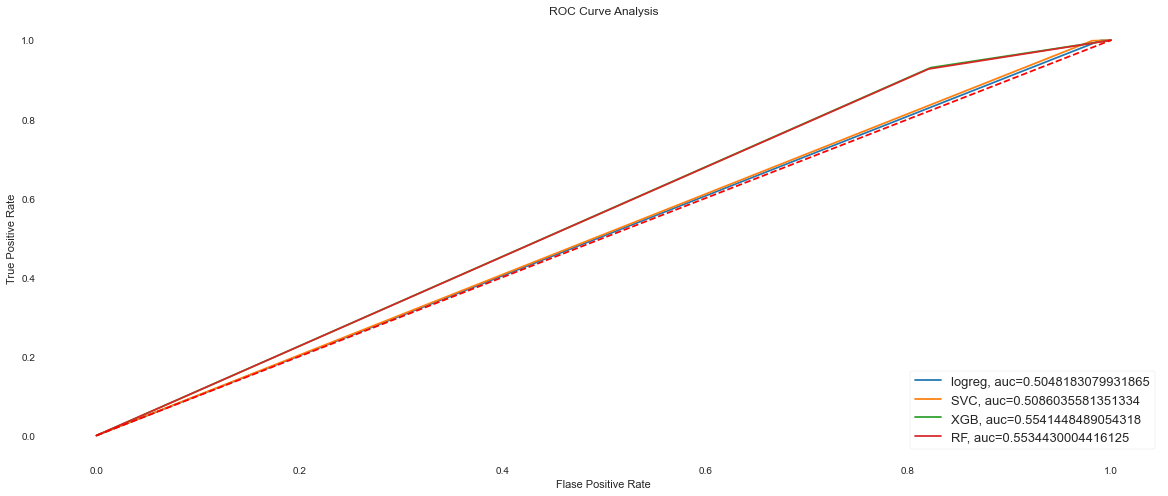

In [49]:
#roc curve
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(fpr_l,tpr_l,label="logreg, auc="+str(auc_l))
plt.plot(fpr_s,tpr_s,label="SVC, auc="+str(auc_s))
plt.plot(fpr_x,tpr_x,label="XGB, auc="+str(auc_x))
plt.plot(fpr_r,tpr_r,label="RF, auc="+str(auc_r))
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve Analysis')
plt.legend(prop={'size':13}, loc='lower right')

In [50]:
from sklearn.metrics import fbeta_score

def fbeta_scaled(x_trn, y_trn, x_tst, y_tst):
    logistic_reg = LogisticRegression()
    svm_model = svm.SVC()
    xgb = XGBClassifier()
    random_forest = RandomForestClassifier()
    
    l = logistic_reg.fit(x_trn,y_trn)
    s = svm_model.fit(x_trn,y_trn)
    x = xgb.fit(x_trn,y_trn)
    r = random_forest.fit(x_trn,y_trn)
    
    l_pred = l.predict(x_tst)
    s_pred = s.predict(x_tst)
    x_pred = x.predict(x_tst)
    r_pred = r.predict(x_tst)
    
    l_fbeta = fbeta_score(y_tst,l_pred,3)
    s_fbeta = fbeta_score(y_tst,s_pred,3)
    x_fbeta = fbeta_score(y_tst,x_pred,3)
    r_fbeta = fbeta_score(y_tst,r_pred,3)
    
    fbeta_scaled= {'model':['LogisticReg','SVM','XGb','RandomForest'], 
              'fb_scr':[l_fbeta,s_fbeta,x_fbeta,r_fbeta]}
    fbeta_scaled = pd.DataFrame(data= fbeta_scaled)
    
    return fbeta_scaled

In [51]:
fbeta_scaled(X_train_scaledData,y_train,X_test_scaledData,y_test)

,model,fb_scr
0,LogisticReg,0.967222
1,SVM,0.966875
2,XGb,0.911749
3,RandForest,0.920695


In [53]:
model_xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10, 
                      gamma=10)

x = model_xgb.fit(X_train_scaledData,y_train)
x_pred = x.predict(X_test_scaledData)

test_acc = accuracy_score(y_test,x_pred)
train_acc = accuracy_score(y_train, model_xgb.predict(X_train_scaledData))
           
print('The accuracy of Test Data: {} and Train data: {}'.format(test_acc, train_acc))

[17:06:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


The accuracy of Test Data: 0.7511688311688312 and Train data: 0.7503247596778384


In [54]:
roc_auc_x = metrics.roc_auc_score(y_test.statusCode,x_pred)
roc_auc_x

0.5058513658444262

In [56]:
logistic_reg = LogisticRegression(solver='saga',C=0.1)

l = logistic_reg.fit(X_train_scaledData, y_train)
l_pred = l.predict(X_test_scaledData)

In [57]:
roc_logReg_auc_x = metrics.roc_auc_score(y_test.statusCode,l_pred)
roc_logReg_auc_x

0.5037852501419469

In [29]:
test_acc = accuracy_score(y_test,l_pred)
train_acc = accuracy_score(y_train, l.predict(X_train_scaled))
           
print('The accuracy of Test Data: {} and Train data: {}'.format(test_acc, train_acc))

Test accuracy: 0.7501298701298701 and Train accuracy: 0.7491882062605533


In [58]:
#  Get the coefficient score
logRegCoef = pd.DataFrame(sorted(list(zip(X.columns, logistic_reg.coef_[0])),
                                   key=(lambda x: x[1]),
                                   reverse=True),
                            columns=['Feature', 'Coefficient'])
logRegCoef

,Feature,Coefficient
0,funding_rounds,0.477281
1,No_Of_Investors,0.422403
2,average_time_delay_rounds_number,0.192271
3,average_raised_usd,0.141602
4,MainCatCode,0.077439
5,total_funding,0.070194
6,homepage_url_code,0.054898
7,time_delayFor_first_round_number,-0.038870
8,USA_Region,-0.074621


In [59]:
# Calculate the intercept value
logistic_reg.intercept_[0]

1.2149430094278943

The probability of success for startups with first funding is 77.12%
